### MNST with Tensorflow

In [2]:
from tensorflow import keras as k
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = k.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train = k.utils.to_categorical(y_train, 10)
y_test = k.utils.to_categorical(y_test, 10)


In [4]:
model = k.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(784,)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.3407 - accuracy: 0.8970 - val_loss: 0.1298 - val_accuracy: 0.9613
Epoch 2/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1359 - accuracy: 0.9601 - val_loss: 0.0978 - val_accuracy: 0.9698
Epoch 3/20
375/375 [==============================] - 16s 43ms/step - loss: 0.0960 - accuracy: 0.9714 - val_loss: 0.0886 - val_accuracy: 0.9734
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0763 - accuracy: 0.9769 - val_loss: 0.0893 - val_accuracy: 0.9751
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0588 - accuracy: 0.9809 - val_loss: 0.0815 - val_accuracy: 0.9773
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0531 - accuracy: 0.9829 - val_loss: 0.0868 - val_accuracy: 0.9768
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0786 - val_accuracy: 0.9784
Epo

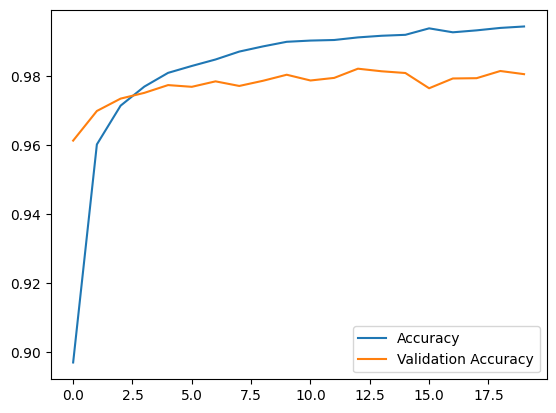

In [15]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

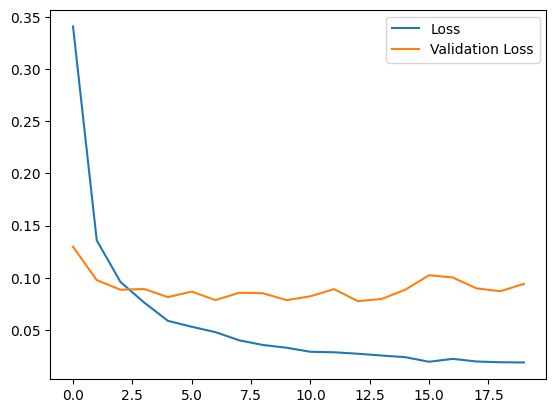

In [18]:
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

313/313 [==============================] - 1s 2ms/step


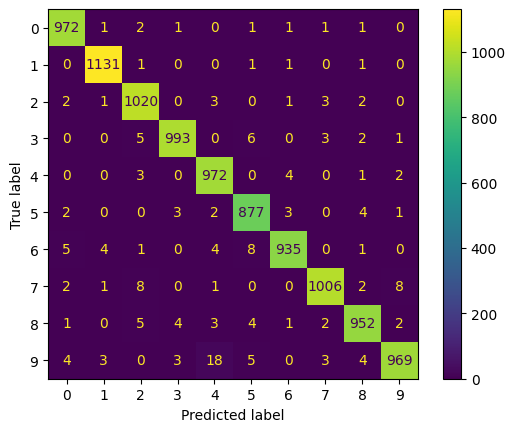

In [27]:
ypred = model.predict(x_test)
ypred_classes = np.argmax(ypred, axis=1)
ytest_classes = np.argmax(y_test, axis=1)
cc = confusion_matrix(ytest_classes, ypred_classes)
ccs = ConfusionMatrixDisplay(confusion_matrix=cc)
ccs.plot()

### CIFAR with Tensorflow

In [33]:
(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

y_train = k.utils.to_categorical(y_train, 10)
y_test = k.utils.to_categorical(y_test, 10)


In [38]:
model = k.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(3072,)),
    k.layers.Dropout(0.2),
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

313/313 [==============================] - 1s 4ms/step


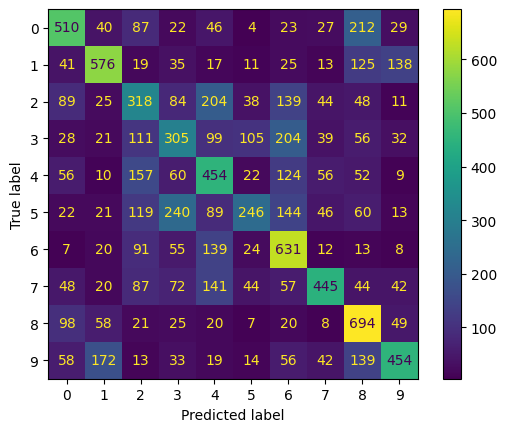

In [41]:
ypred = model.predict(x_test)
ypred_classes = np.argmax(ypred, axis=1)
ytest_classes = np.argmax(y_test, axis=1)
cc = confusion_matrix(ytest_classes, ypred_classes)
ccs = ConfusionMatrixDisplay(confusion_matrix=cc)
ccs.plot()